## Simulasi Deductible dan Policy Limit Klaim Asuransi Flight Travel

&nbsp;

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('[X]')

[X]


In [2]:
claim_data = pd.read_csv('dataset/tsa_claims.csv', low_memory=False)
claim_data.head()
claim_data.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

&nbsp;

In [3]:
claim_data = claim_data.drop(columns=['Claim Number', 'Airport Code', 'Airline Name', 'Disposition', 'Airport Name'])
claim_data

,Date Received,Incident Date,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount
0,4-Jan-02,12/12/2002 0:00,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00
1,2-Feb-02,1/16/2004 0:00,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00
2,4-Feb-02,11/26/2003 0:00,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92
3,7-Feb-02,1/6/2003 0:00,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00
4,18-Feb-02,2/5/2005 0:00,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79
...,...,...,...,...,...,...,...,...
204262,20-Nov-15,16-Oct-15,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN
204263,17-Dec-15,2-Dec-15,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN
204264,22-Dec-15,20-Dec-15,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN
204265,30-Dec-15,28-Dec-15,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN


In [4]:
claim_data = claim_data.dropna(subset=claim_data.columns.values)

In [5]:
claim_data.dtypes

Date Received    object
Incident Date    object
Claim Type       object
Claim Site       object
Item             object
Claim Amount     object
Status           object
Close Amount     object
dtype: object

&nbsp;

In [6]:
claim_data = claim_data.copy()

claim_data['Date Received'] = pd.to_datetime(
    claim_data['Date Received'], format='mixed', dayfirst=True, errors='coerce'
)
claim_data['Incident Date'] = pd.to_datetime(
    claim_data['Incident Date'], format='mixed', dayfirst=True, errors='coerce'
)

In [7]:
claim_data['Claim Amount'] = (
    claim_data['Claim Amount']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(r'[\;,]', '', regex=True)
    .astype(float)
)

claim_data['Close Amount'] = (
    claim_data['Close Amount']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(r'[\;,]', '', regex=True)
    .astype(float)
)

In [8]:
claim_data.dtypes

Date Received    datetime64[ns]
Incident Date    datetime64[ns]
Claim Type               object
Claim Site               object
Item                     object
Claim Amount            float64
Status                   object
Close Amount            float64
dtype: object

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() 
status_encoded = encoder.fit_transform(claim_data[['Status']])
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(claim_data[['Status']])
feature_names = encoder.get_feature_names_out(['Status'])
status_df = pd.DataFrame(status_encoded, columns=feature_names, index=claim_data.index)
claim_data = pd.concat([claim_data, status_df], axis=1)
claim_data = claim_data.drop('Status', axis=1)

In [10]:
claim_data = claim_data.drop(columns=['Status_Pending response from claimant', 'Status_Closed as a contractor claim'])
claim_data

,Date Received,Incident Date,Claim Type,Claim Site,Item,Claim Amount,Close Amount,Status_Approved,Status_Canceled,Status_Denied,Status_Settled
0,2002-01-04,2002-12-12 00:00:00,Property Damage,Checkpoint,Other,350.00,350.00,1.0,0.0,0.0,0.0
1,2002-02-02,2004-01-16 00:00:00,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,50.00,0.0,0.0,0.0,1.0
2,2002-02-04,2003-11-26 00:00:00,Property Damage,Checked Baggage,Cell Phones,278.88,227.92,0.0,0.0,0.0,1.0
3,2002-02-07,2003-06-01 00:00:00,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,50.00,1.0,0.0,0.0,0.0
4,2002-02-18,2005-05-02 00:00:00,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,84.79,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145138,2009-12-31,2009-12-14 00:00:00,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,0.00,0.0,0.0,1.0,0.0
145139,2009-12-31,2009-12-17 07:55:00,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,695.00,0.00,0.0,0.0,1.0,0.0
145140,2009-12-31,2009-12-15 00:00:00,Passenger Property Loss,Checked Baggage,Locks,25.50,0.00,0.0,0.0,1.0,0.0
145141,2009-12-31,2009-12-16 10:00:00,Passenger Property Loss,Checked Baggage,Locks,20.00,0.00,0.0,0.0,1.0,0.0


In [11]:
claim_data.to_csv('travel_insurance_claim.csv')

&nbsp;

### Data load

In [12]:
df = pd.read_csv('travel_insurance_claim.csv', index_col=0)
df.head()

,Date Received,Incident Date,Claim Type,Claim Site,Item,Claim Amount,Close Amount,Status_Approved,Status_Canceled,Status_Denied,Status_Settled
0,2002-01-04,2002-12-12 00:00:00,Property Damage,Checkpoint,Other,350.00,350.00,1.0,0.0,0.0,0.0
1,2002-02-02,2004-01-16 00:00:00,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,50.00,0.0,0.0,0.0,1.0
2,2002-02-04,2003-11-26 00:00:00,Property Damage,Checked Baggage,Cell Phones,278.88,227.92,0.0,0.0,0.0,1.0
3,2002-02-07,2003-06-01 00:00:00,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,50.00,1.0,0.0,0.0,0.0
4,2002-02-18,2005-05-02 00:00:00,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,84.79,1.0,0.0,0.0,0.0


&nbsp;

### Analisis Parameter Acuan
parameter yang di pertimbangkan beracu pada jenis claim yang berhubungan  dengan kehilangan/kerusakan bagasi

&nbsp;

#### Nilai Policy Limit

Claim Type
Employee Loss (MPCECA)       2929.51
Motor Vehicle                6002.62
Passenger Theft              9999.99
Property Damage             15000.00
Personal Injury             20000.00
Passenger Property Loss    250000.00
Name: Close Amount, dtype: float64


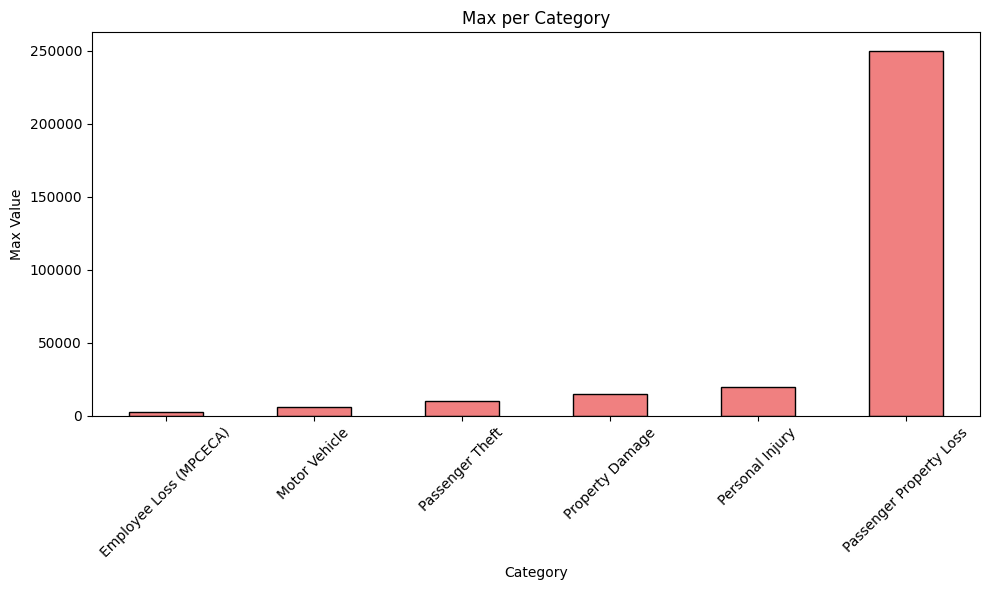

In [13]:
max_val = df.groupby('Claim Type')['Close Amount'].max().sort_values()
print(max_val)
plt.figure(figsize=(10, 6))
max_val.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Max per Category')
plt.ylabel('Max Value')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

&nbsp;

Nilai Policy Limit akan di atur secara tetap berdasarkan nilai maximum yang ada di dataset pihak asuransi

&nbsp;

#### Nilai Deductible

In [14]:
df.groupby('Claim Type')['Close Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Employee Loss (MPCECA),416.0,109.533365,240.327646,0.0,0.0,24.995,117.585,2929.51
Motor Vehicle,62.0,1107.395484,1450.350982,0.0,2.5,500.000,1357.855,6002.62
Passenger Property Loss,75483.0,85.657702,1016.129892,0.0,0.0,0.000,57.500,250000.00
Passenger Theft,432.0,144.314537,557.849959,0.0,0.0,30.000,100.000,9999.99
Personal Injury,287.0,474.662648,1858.997616,0.0,0.0,0.000,30.000,20000.00
Property Damage,48296.0,98.362652,299.031836,0.0,0.0,21.455,79.970,15000.00


### Hasil Analisis Tiap Claim Type:

- Employee Loss (MPCECA): Low mean (~110), moderate CV (2.19) -> Fixed to 50 
- Motor Vehicle: Higher mean (~1,107), low CV (1.31) -> Fixed to 650
- Passenger Property Loss: Low mean (86), very high CV (11.86), extreme max (~2,919x mean) -> 10% claim
- Personal Theft: Low mean (~144), high CV (3.87) -> 10% claim
- Personal Injury: Moderate mean (~475), high CV (3.91) -> 5% claim
- Property Damage: Low mean (~98), moderate-high CV (3.04): Fixed to 100

&nbsp;

In [15]:
#python dict representation
claim_parameters = {
    'Property Damage': {
        'deductible': 100.0,
        'policy_limit': 15000.00  # USD
    },
    'Passenger Property Loss': {
        'deductible': '10% * claim',
        'policy_limit': 250000.0  # USD
    },
    'Passenger Theft': {
        'deductible': '10% * claim', 
        'policy_limit': 9999.99  # USD
    },
    'Employee Loss (MPCECA)': {
        'deductible': 50.0,
        'policy_limit': 2929.51  # USD
    },
    'Motor Vehicle': {
        'deductible': 650.0,
        'policy_limit': 9999.99  # USD
    },
    'Personal Injury': {
        'deductible': '5% * claim', 
        'policy_limit': 20000.00  # USD
    }
}

pd.DataFrame(claim_parameters)

,Property Damage,Passenger Property Loss,Passenger Theft,Employee Loss (MPCECA),Motor Vehicle,Personal Injury
deductible,100.0,10% * claim,10% * claim,50.00,650.00,5% * claim
policy_limit,15000.0,250000.0,9999.99,2929.51,9999.99,20000.0


&nbsp;

### Penerapan Perhitungan Rumus 

$Paid Amount = MIN ((Close Amount - Deductible), PolicyLimit)$

In [16]:
df['deductible'] = np.where(
    df['Claim Type'] == 'Property Damage', 100.0,
    np.where(
        df['Claim Type'] == 'Passenger Property Loss', 0.10 * df['Claim Amount'],
        np.where(
            df['Claim Type'] == 'Passenger Theft', 0.10 * df['Claim Amount'],
            np.where(
                df['Claim Type'] == 'Employee Loss (MPCECA)', 50.0,
                np.where(
                    df['Claim Type'] == 'Motor Vehicle', 650.0,
                    np.where(
                        df['Claim Type'] == 'Personal Injury', 0.05 * df['Claim Amount'],
                        np.nan  # default for unknown types
                    )
                )
            )
        )
    )
)

df['policy_limit'] = np.where(
    df['Claim Type'] == 'Property Damage', 15000.00,
    np.where(
        df['Claim Type'] == 'Passenger Property Loss', 250000.0,
        np.where(
            df['Claim Type'] == 'Passenger Theft', 9999.99,
            np.where(
                df['Claim Type'] == 'Employee Loss (MPCECA)', 2929.51,
                np.where(
                    df['Claim Type'] == 'Motor Vehicle', 9999.99,
                    np.where(
                        df['Claim Type'] == 'Personal Injury', 20000.00,
                        np.nan  # default for unknown types
                    )
                )
            )
        )
    )
)

df['Paid Amount'] = np.minimum(
    df['Close Amount'] - df['deductible'],
    df['policy_limit']
).clip(lower=0)

df

,Date Received,Incident Date,Claim Type,Claim Site,Item,Claim Amount,Close Amount,Status_Approved,Status_Canceled,Status_Denied,Status_Settled,deductible,policy_limit,Paid Amount
0,2002-01-04,2002-12-12 00:00:00,Property Damage,Checkpoint,Other,350.00,350.00,1.0,0.0,0.0,0.0,100.00,15000.0,250.00
1,2002-02-02,2004-01-16 00:00:00,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,50.00,0.0,0.0,0.0,1.0,100.00,15000.0,0.00
2,2002-02-04,2003-11-26 00:00:00,Property Damage,Checked Baggage,Cell Phones,278.88,227.92,0.0,0.0,0.0,1.0,100.00,15000.0,127.92
3,2002-02-07,2003-06-01 00:00:00,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,50.00,1.0,0.0,0.0,0.0,100.00,15000.0,0.00
4,2002-02-18,2005-05-02 00:00:00,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,84.79,1.0,0.0,0.0,0.0,100.00,15000.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145138,2009-12-31,2009-12-14 00:00:00,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,0.00,0.0,0.0,1.0,0.0,100.00,15000.0,0.00
145139,2009-12-31,2009-12-17 07:55:00,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,695.00,0.00,0.0,0.0,1.0,0.0,69.50,250000.0,0.00
145140,2009-12-31,2009-12-15 00:00:00,Passenger Property Loss,Checked Baggage,Locks,25.50,0.00,0.0,0.0,1.0,0.0,2.55,250000.0,0.00
145141,2009-12-31,2009-12-16 10:00:00,Passenger Property Loss,Checked Baggage,Locks,20.00,0.00,0.0,0.0,1.0,0.0,2.00,250000.0,0.00


&nbsp;

### Analisis dan Interpretasi Data

In [17]:
df.columns

Index(['Date Received', 'Incident Date', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Close Amount', 'Status_Approved', 'Status_Canceled',
       'Status_Denied', 'Status_Settled', 'deductible', 'policy_limit',
       'Paid Amount'],
      dtype='object')

In [18]:
# bersihkan bbrp kolom dlu biar ndk kebanyakan

clean_df = df.drop(columns=['Item','Status_Canceled','Status_Denied','Status_Settled','Claim Site','Status_Approved'])
clean_df

,Date Received,Incident Date,Claim Type,Claim Amount,Close Amount,deductible,policy_limit,Paid Amount
0,2002-01-04,2002-12-12 00:00:00,Property Damage,350.00,350.00,100.00,15000.0,250.00
1,2002-02-02,2004-01-16 00:00:00,Property Damage,100.00,50.00,100.00,15000.0,0.00
2,2002-02-04,2003-11-26 00:00:00,Property Damage,278.88,227.92,100.00,15000.0,127.92
3,2002-02-07,2003-06-01 00:00:00,Property Damage,50.00,50.00,100.00,15000.0,0.00
4,2002-02-18,2005-05-02 00:00:00,Property Damage,84.79,84.79,100.00,15000.0,0.00
...,...,...,...,...,...,...,...,...
145138,2009-12-31,2009-12-14 00:00:00,Property Damage,175.90,0.00,100.00,15000.0,0.00
145139,2009-12-31,2009-12-17 07:55:00,Passenger Property Loss,695.00,0.00,69.50,250000.0,0.00
145140,2009-12-31,2009-12-15 00:00:00,Passenger Property Loss,25.50,0.00,2.55,250000.0,0.00
145141,2009-12-31,2009-12-16 10:00:00,Passenger Property Loss,20.00,0.00,2.00,250000.0,0.00


&nbsp;

#### Analisis Agregat (Konten dibuat dari bantuan LLM)

In [19]:
# --- 1. MEMUAT DATA DAN PEMBERSIHAN ---
# Pastikan file 'datasets.csv' berada di direktori yang sama dengan notebook ini.
df = pd.read_csv("datasets.csv")

# Bersihkan kolom 'Unnamed: 0' jika ada (biasanya sisa dari indexing CSV)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Pastikan kolom-kolom kunci bertipe numerik
numeric_cols = ['Claim Amount', 'deductible', 'policy_limit', 'Paid Amount']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan nilai NaN yang mungkin muncul dari konversi
df.dropna(subset=numeric_cols, inplace=True)

# --- 2. PERHITUNGAN METRIK TAMBAHAN ---
# Hitung 'Beban Nasabah' (Customer Burden): Kerugian yang tidak dibayar asuransi.
df['Customer Burden'] = df['Claim Amount'] - df['Paid Amount']

# Tentukan Klaim yang mencapai Policy Limit
df['Limit Reached'] = np.where(df['Paid Amount'] >= df['policy_limit'], 1, 0)
# Tentukan Klaim yang ditolak (Paid Amount = 0) karena Deductible
df['Zero Paid'] = np.where(df['Paid Amount'] <= 0, 1, 0)

claim_analysis = df.groupby('Claim Type').agg(
    Total_Klaim=('Claim Type', 'size'),
    Rata_rata_Kerugian_Aktual=('Claim Amount', 'mean'),
    Rata_rata_Deductible=('deductible', 'mean'),
    Rata_rata_Klaim_Dibayar=('Paid Amount', 'mean'),
    Rata_rata_Beban_Nasabah=('Customer Burden', 'mean'),
    Jumlah_Klaim_Nol=('Zero Paid', 'sum'),
    Jumlah_Capai_Limit=('Limit Reached', 'sum')
).reset_index()

# Hitung Persentase Klaim Nol dan Klaim Capai Limit
claim_analysis['Persen_Klaim_Nol'] = (claim_analysis['Jumlah_Klaim_Nol'] / claim_analysis['Total_Klaim']) * 100
claim_analysis['Persen_Capai_Limit'] = (claim_analysis['Jumlah_Capai_Limit'] / claim_analysis['Total_Klaim']) * 100

# Format tampilan angka ke dua desimal
cols_to_round = claim_analysis.columns.drop(['Claim Type', 'Total_Klaim', 'Jumlah_Klaim_Nol', 'Jumlah_Capai_Limit'])
claim_analysis[cols_to_round] = claim_analysis[cols_to_round].round(2)

# --- MENAMPILKAN DATAFRAME ---
# Ini akan menampilkan DataFrame di output notebook Anda.
print("--- DataFrame claim_analysis ---")
claim_analysis

--- DataFrame claim_analysis ---


,Claim Type,Total_Klaim,Rata_rata_Kerugian_Aktual,Rata_rata_Deductible,Rata_rata_Klaim_Dibayar,Rata_rata_Beban_Nasabah,Jumlah_Klaim_Nol,Jumlah_Capai_Limit,Persen_Klaim_Nol,Persen_Capai_Limit
0,Employee Loss (MPCECA),416,609.48,50.00,84.14,525.34,253,0,60.82,0.0
1,Motor Vehicle,62,1663.47,650.00,725.16,938.31,33,0,53.23,0.0
2,Passenger Property Loss,75483,34064.36,3406.44,72.04,33992.32,44590,0,59.07,0.0
3,Passenger Theft,432,713.99,71.40,123.14,590.85,176,0,40.74,0.0
4,Personal Injury,287,1041932.33,52096.62,322.31,1041610.02,219,0,76.31,0.0
5,Property Damage,48296,430.28,100.00,61.02,369.26,38470,0,79.65,0.0


&nbsp;

#### Visualisasi Data (Konten dibuat dari bantuan LLM)

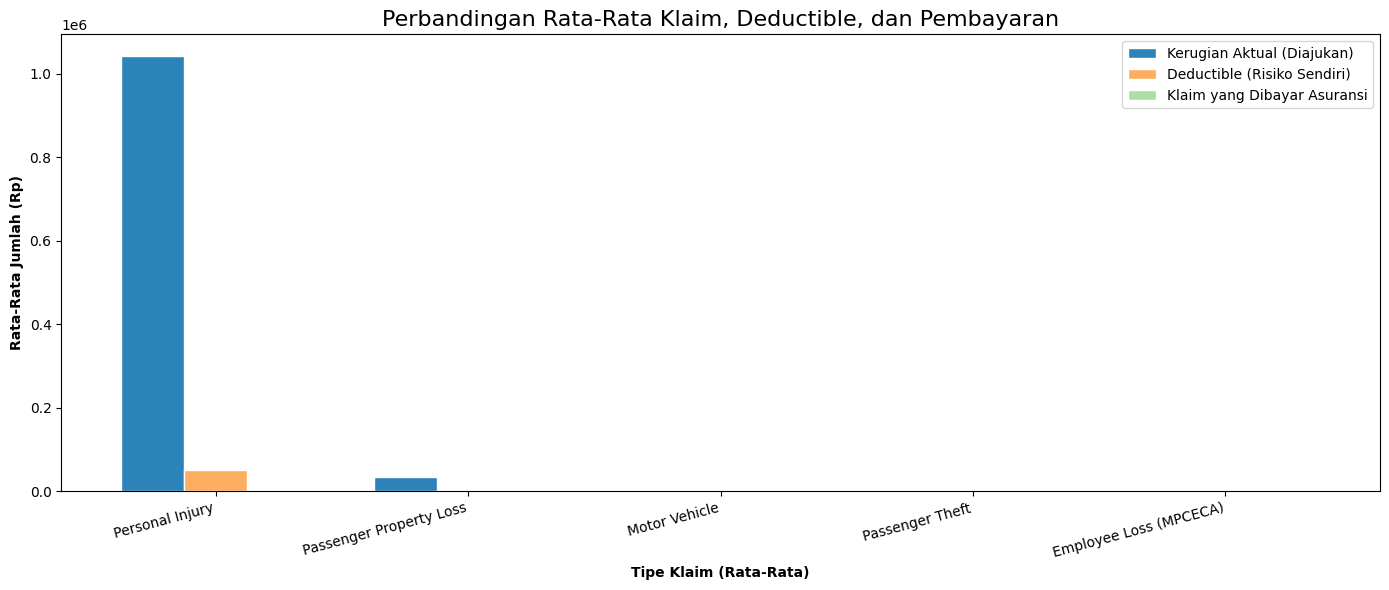

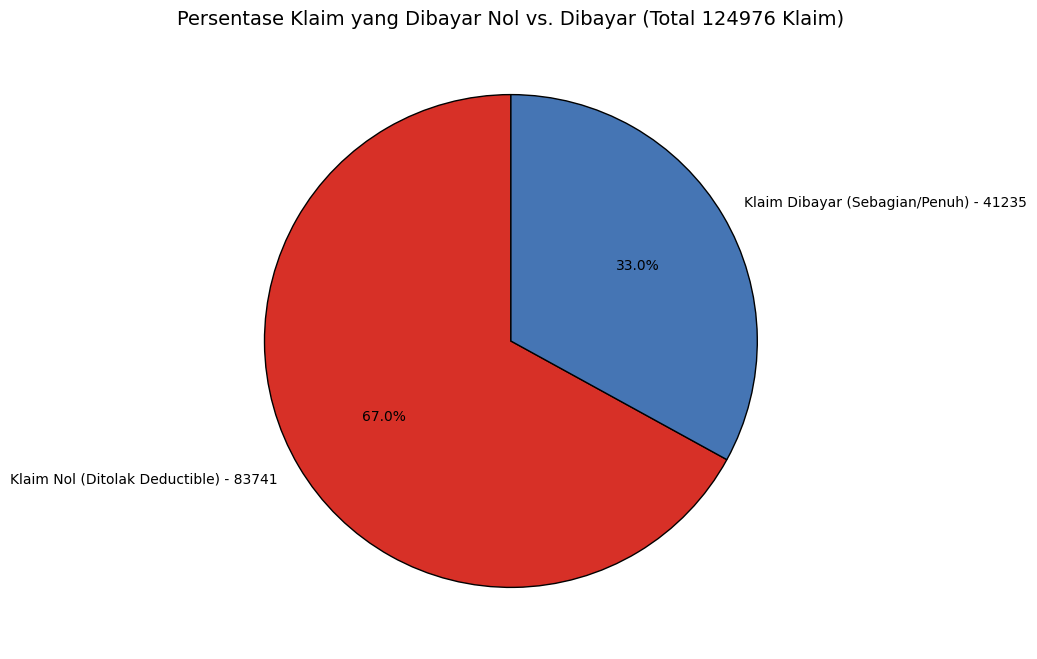

In [20]:
# --- 4. VISUALISASI HASIL SIMULASI ---

# A. Bar Chart: Perbandingan Kerugian, Deductible, dan Pembayaran
plt.figure(figsize=(14, 6))
# Ambil 5 Tipe Klaim teratas berdasarkan Kerugian Aktual untuk visualisasi
top_5_claims = claim_analysis.sort_values('Rata_rata_Kerugian_Aktual', ascending=False).head(5)

barWidth = 0.25
r1 = np.arange(len(top_5_claims['Claim Type']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, top_5_claims['Rata_rata_Kerugian_Aktual'], color='#2b83ba', width=barWidth, edgecolor='white', label='Kerugian Aktual (Diajukan)')
plt.bar(r2, top_5_claims['Rata_rata_Deductible'], color='#fdae61', width=barWidth, edgecolor='white', label='Deductible (Risiko Sendiri)')
plt.bar(r3, top_5_claims['Rata_rata_Klaim_Dibayar'], color='#abdda4', width=barWidth, edgecolor='white', label='Klaim yang Dibayar Asuransi')

# Tambahkan label dan judul
plt.xlabel('Tipe Klaim (Rata-Rata)', fontweight='bold')
plt.ylabel('Rata-Rata Jumlah (Rp)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(top_5_claims['Claim Type']))], top_5_claims['Claim Type'], rotation=15, ha='right')
plt.title('Perbandingan Rata-Rata Klaim, Deductible, dan Pembayaran', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

# B. Pie Chart: Persentase Klaim yang Dibayar Nol (Dampak Deductible)
total_zero_paid = df['Zero Paid'].sum()
total_claims = len(df)
total_paid = total_claims - total_zero_paid

# Data untuk Pie Chart
pie_data = [total_zero_paid, total_paid]
pie_labels = [f'Klaim Nol (Ditolak Deductible) - {total_zero_paid}', f'Klaim Dibayar (Sebagian/Penuh) - {total_paid}']
pie_colors = ['#d73027', '#4575b4'] # Merah untuk ditolak, Biru untuk dibayar

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=pie_colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title(f'Persentase Klaim yang Dibayar Nol vs. Dibayar (Total {total_claims} Klaim)', fontsize=14)
plt.show()